In [1]:
from pathlib import Path

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyprojroot
import seaborn as sns

import searchnets

In [2]:
def cm_to_inches(cm):
    return cm / 2.54

In [3]:
mpl.style.use(['seaborn-darkgrid', 'seaborn-paper'])

paths

In [4]:
SOURCE_DATA_CSV_PATH = pyprojroot.here('results/VSD/source_data/VSD-searchstims-acc-v-set-size.csv')

FIGURES_ROOT = pyprojroot.here('docs/paper/figures/experiment-2/searchstims-VSD')

/home/bart/.cache/pypoetry/virtualenvs/nicholson-prinz-2021-zheWulbu-py3.7/lib/python3.7/site-packages/pyprojroot/pyprojroot.py:51: UserWarning: Path doesn't exist: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/docs/paper/figures/experiment-2/searchstims-VSD
  warnings.warn("Path doesn't exist: {}".format(path))


constants

In [5]:
LEARNING_RATE = 1e-3

NET_NAMES = [
    'alexnet',
    'VGG16',
    'CORnet_Z',
    'CORnet_S',
]

METHODS = [
    'transfer'
]

MODES = [
    'classify',
]

## load source data

Get just the transfer learning results, then group by network, stimulus, and set size, and compute the mean accuracy for each set size.

In [6]:
df_all = pd.read_csv(SOURCE_DATA_CSV_PATH)

In [7]:
df_alex1 = df_all[
    (df_all.net_name == 'alexnet') &
    (df_all.net_number == 1)
]

/home/bart/.cache/pypoetry/virtualenvs/nicholson-prinz-2021-zheWulbu-py3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


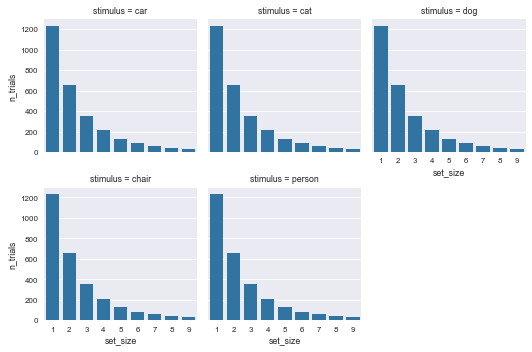

In [8]:
g = sns.FacetGrid(df_alex1, col="stimulus", height=2.5, col_wrap=3)
g.map(sns.barplot, "set_size", "n_trials")

## plot figure

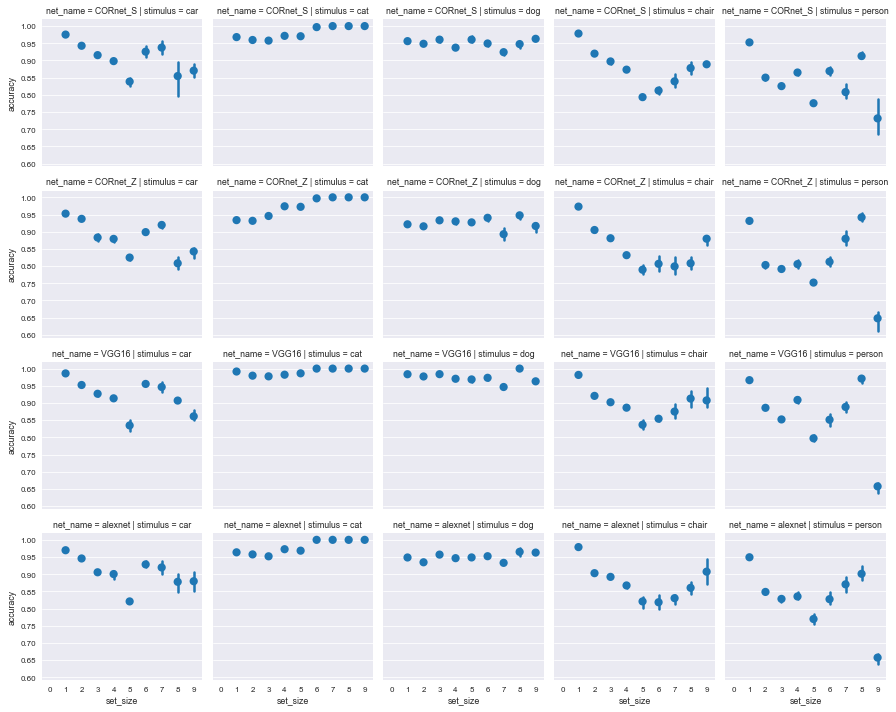

In [9]:
g = sns.FacetGrid(df_all, col="stimulus", row="net_name", height=2.5)
g.map(sns.pointplot, "set_size", "accuracy", order=list(range(10)), join=False);

for ext in ('svg', 'png'):
    fig_path = pyprojroot.here().joinpath(
        f'docs/paper/figures/experiment-2/Pascal-VOC-dataset-set-size.{ext}'
    )
    g.fig.savefig(fig_path, bbox_inches='tight')